In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

%matplotlib inline

In [2]:
files = ['data/turnstile_160402.csv',
         'data/turnstile_160409.csv',
         'data/turnstile_160416.csv',
         'data/turnstile_160423.csv',
         'data/turnstile_160430.csv',
         'data/turnstile_160507.csv',
         'data/turnstile_160514.csv',
         'data/turnstile_160521.csv',
         'data/turnstile_160528.csv', 
         'data/turnstile_160604.csv',
         'data/turnstile_160611.csv',
         'data/turnstile_160618.csv', 
         'data/turnstile_160625.csv']

mta = pd.DataFrame()
frames = []

# Read in all data files to a list
for f in files:
    df = pd.read_csv(f)
    frames.append(df)

# Append all the files together
mta = pd.concat(frames)
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,00:00:00,REGULAR,5595746,1893277
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,04:00:00,REGULAR,5595746,1893282
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,08:00:00,REGULAR,5595746,1893282
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,12:00:00,REGULAR,5595746,1893282
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,16:00:00,REGULAR,5595746,1893282


In [3]:
# Clean up column names
mta.columns = [n.lower().strip() for n in mta.columns]

# Add column with date and time as datetime object
mta['date_time'] = mta['date'] + " " + mta['time']
mta.date_time = pd.to_datetime(mta.date_time, format='%m/%d/%Y %H:%M:%S')
mta.head(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,00:00:00,REGULAR,5595746,1893277,2016-03-26 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,04:00:00,REGULAR,5595746,1893282,2016-03-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,08:00:00,REGULAR,5595746,1893282,2016-03-26 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,12:00:00,REGULAR,5595746,1893282,2016-03-26 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,16:00:00,REGULAR,5595746,1893282,2016-03-26 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,20:00:00,REGULAR,5595746,1893282,2016-03-26 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,00:00:00,REGULAR,5595746,1893282,2016-03-27 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,04:00:00,REGULAR,5595746,1893282,2016-03-27 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,08:00:00,REGULAR,5595746,1893282,2016-03-27 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,12:00:00,REGULAR,5595746,1893282,2016-03-27 12:00:00


In [4]:
# Check for duplicates
mta.groupby(['c/a', 
             'unit', 
             'scp', 
             'station', 
             'linename', 
             'date_time']).size().sort_values(ascending=False).value_counts()


1    2523464
2         51
dtype: int64

In [5]:
# Sort by date and time
mta.sort_values(['c/a', 
                 'unit', 
                 'scp', 
                 'station', 
                 'linename', 
                 'date_time'],
                inplace=True, 
                ascending=False)

# Remove duplicates
mta.drop_duplicates(subset=['c/a', 'unit', 'scp', 'station', 'date_time'], inplace=True)

# Sanity check for duplicates
mta.groupby(['c/a', 
             'unit', 
             'scp', 
             'station', 
             'linename', 
             'date_time']).size().sort_values(ascending=False).value_counts()


1    2523515
dtype: int64

In [6]:
#Sort by date and time
mta.sort_values('date_time', inplace = True)

# Calculate total entires and exits
mta['ent_diff'] = mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename'])\
                .entries.transform(lambda x: abs(x - x.shift()))

mta['ex_diff'] = mta.groupby(['c/a', 'unit', 'scp', 'station', 'linename'])\
                .exits.transform(lambda x: abs(x - x.shift()))
mta.head(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,ent_diff,ex_diff
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,00:00:00,REGULAR,5595746,1893277,2016-03-26,NaN,NaN
64672,N129,R382,00-03-01,GRANT AV,A,IND,03/26/2016,00:00:00,REGULAR,9026227,6571299,2016-03-26,NaN,NaN
66197,N141,R356,00-00-04,OZONE PK LEFFRT,A,IND,03/26/2016,00:00:00,REGULAR,5028288,2149106,2016-03-26,NaN,NaN
54893,N086,R282,00-00-02,SPRING ST,CE,IND,03/26/2016,00:00:00,REGULAR,337791552,84416229,2016-03-26,NaN,NaN
181094,R533,R055,00-03-07,FLUSHING-MAIN,7,IRT,03/26/2016,00:00:00,REGULAR,470447,251614,2016-03-26,NaN,NaN
69011,N195,R358,00-00-02,BEACH 25 ST,A,IND,03/26/2016,00:00:00,REGULAR,1670175,974583,2016-03-26,NaN,NaN
53160,N076,R111,00-00-01,23 ST,CE,IND,03/26/2016,00:00:00,REGULAR,8595576,4790479,2016-03-26,NaN,NaN
19842,C008,R099,00-00-02,DEKALB AV,BDNQR,BMT,03/26/2016,00:00:00,REGULAR,10081426,8510226,2016-03-26,NaN,NaN
129848,R155,R116,01-00-03,50 ST,1,IRT,03/26/2016,00:00:00,REGULAR,1073823,448263,2016-03-26,NaN,NaN
30203,H009,R235,00-03-01,BEDFORD AV,L,BMT,03/26/2016,00:00:00,REGULAR,15391399,19330813,2016-03-26,NaN,NaN


In [7]:
# Add traffic column (aggregate of entires and exits)
mta['traffic'] = mta.ent_diff + mta.ex_diff

# Sort
mta.sort_values(['c/a', 'unit', 'scp', 'station', 'linename', 'date_time'], inplace=True)

mta.head(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,ent_diff,ex_diff,traffic
0,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,00:00:00,REGULAR,5595746,1893277,2016-03-26 00:00:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,04:00:00,REGULAR,5595746,1893282,2016-03-26 04:00:00,0.0,5.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,08:00:00,REGULAR,5595746,1893282,2016-03-26 08:00:00,0.0,0.0,0.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,12:00:00,REGULAR,5595746,1893282,2016-03-26 12:00:00,0.0,0.0,0.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,16:00:00,REGULAR,5595746,1893282,2016-03-26 16:00:00,0.0,0.0,0.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,20:00:00,REGULAR,5595746,1893282,2016-03-26 20:00:00,0.0,0.0,0.0
6,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,00:00:00,REGULAR,5595746,1893282,2016-03-27 00:00:00,0.0,0.0,0.0
7,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,04:00:00,REGULAR,5595746,1893282,2016-03-27 04:00:00,0.0,0.0,0.0
8,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,08:00:00,REGULAR,5595746,1893282,2016-03-27 08:00:00,0.0,0.0,0.0
9,A002,R051,02-00-00,59 ST,NQR456,BMT,03/27/2016,12:00:00,REGULAR,5595746,1893282,2016-03-27 12:00:00,0.0,0.0,0.0


## Some turnstile values are obvious errors, need to figure out what is a reasonable amount of traffic per turnstile. Decided to look at the values for the most heavily trafficked station, Time Square.

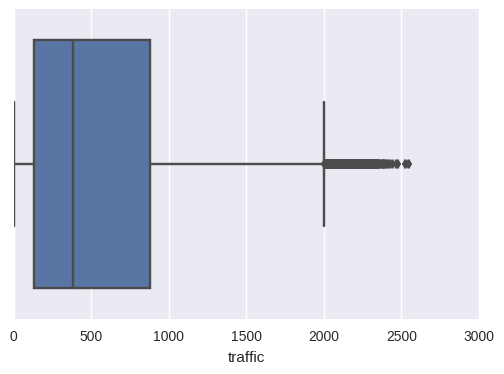

In [84]:
# Subset Time Square data and plot boxplot of traffic
time_sq = mta[(mta.station == 'TIMES SQ-42 ST')]
sns.boxplot(time_sq.traffic[time_sq.traffic < 100000]);

In [9]:
# Subset our data to include only turnstiles less than 3000
mta3000 = mta[(mta.traffic < 3000) ]

# Print tail to check traffic values are correct
mta3000.sort_values(['traffic']).tail()


,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,ent_diff,ex_diff,traffic
95671,N506,R022,00-00-00,34 ST-HERALD SQ,BDFMNQR,IND,05/23/2016,20:00:00,REGULAR,4137036,6672955,2016-05-23 20:00:00,1757.0,1240.0,2997.0
154123,R249,R179,01-00-09,86 ST,456,IRT,04/04/2016,12:00:00,REGULAR,1183712,11522439,2016-04-04 12:00:00,102.0,2895.0,2997.0
149574,R238,R046,00-03-04,GRD CNTRL-42 ST,4567S,IRT,06/14/2016,20:00:00,REGULAR,9236584,9879642,2016-06-14 20:00:00,2140.0,858.0,2998.0
154281,R249,R179,01-00-09,86 ST,456,IRT,04/20/2016,12:00:00,REGULAR,1200700,11674670,2016-04-20 12:00:00,117.0,2882.0,2999.0
157596,R258,R132,00-00-02,125 ST,456,IRT,05/23/2016,17:00:00,REGULAR,2628377,18614742,2016-05-23 17:00:00,1909.0,1090.0,2999.0


## Now we want to aggregate all the turnstile data for each station and line together so that we can see the total foot traffic for each station. 

In [10]:
mta_traffic = mta3000.groupby(['station', 'linename', 'date_time'], as_index=False)\
              [['traffic']].sum()
mta_traffic.head(10)

,station,linename,date_time,traffic
0,1 AV,L,2016-03-26 04:00:00,3137.0
1,1 AV,L,2016-03-26 08:00:00,1504.0
2,1 AV,L,2016-03-26 12:00:00,5502.0
3,1 AV,L,2016-03-26 16:00:00,8825.0
4,1 AV,L,2016-03-26 20:00:00,10846.0
5,1 AV,L,2016-03-27 00:00:00,8617.0
6,1 AV,L,2016-03-27 04:00:00,2996.0
7,1 AV,L,2016-03-27 08:00:00,1011.0
8,1 AV,L,2016-03-27 12:00:00,4279.0
9,1 AV,L,2016-03-27 16:00:00,7125.0


In [11]:
# Add date column
mta_traffic['date'] = mta_traffic.date_time.apply(lambda x: x.date())


In [12]:
# Total traffic per Station for each day
daily_traffic = mta_traffic.groupby(['station', 'linename', 'date'], as_index=False)[['traffic']].\
                sum().sort_values('traffic', ascending= False)

print daily_traffic.traffic.describe()
daily_traffic.head(10)


count     42801.000000
mean      19289.095045
std       24770.383982
min           0.000000
25%        6188.000000
50%       11472.000000
75%       22239.000000
max      282012.000000
Name: traffic, dtype: float64


,station,linename,date,traffic
28124,GRD CNTRL-42 ST,4567S,2016-03-31,282012.0
28123,GRD CNTRL-42 ST,4567S,2016-03-30,279249.0
28122,GRD CNTRL-42 ST,4567S,2016-03-29,277801.0
28193,GRD CNTRL-42 ST,4567S,2016-06-08,276619.0
28157,GRD CNTRL-42 ST,4567S,2016-05-03,275709.0
28207,GRD CNTRL-42 ST,4567S,2016-06-22,273699.0
28160,GRD CNTRL-42 ST,4567S,2016-05-06,272946.0
28178,GRD CNTRL-42 ST,4567S,2016-05-24,270013.0
28180,GRD CNTRL-42 ST,4567S,2016-05-26,269132.0
28187,GRD CNTRL-42 ST,4567S,2016-06-02,268554.0


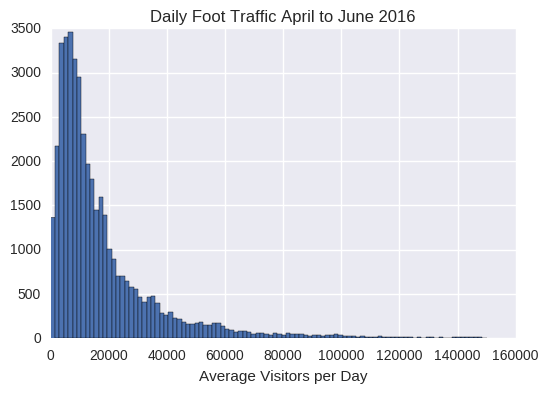

In [13]:
plt.hist(daily_traffic.traffic, bins=100, range=(0,150000));
plt.title("Daily Foot Traffic April to June 2016")
plt.xlabel("Average Visitors per Day")


In [14]:
# Calculate average daily traffic per station
avg_daily_traffic = mta_traffic.groupby(['station', 'linename', 'date'], as_index=False)[['traffic']].\
                    sum().sort_values('traffic', ascending= False)

avg_daily_traffic = avg_daily_traffic.groupby(['station', 'linename'], as_index=False)[['traffic']].mean().\
                    sort_values('traffic', ascending=False).reset_index()

avg_daily_traffic.head(50)

,index,station,linename,traffic
0,310,GRD CNTRL-42 ST,4567S,210072.670330
1,90,34 ST-HERALD SQ,BDFMNQR,201552.000000
2,445,TIMES SQ-42 ST,1237ACENQRS,144006.560440
3,94,34 ST-PENN STA,ACE,134450.989011
4,103,42 ST-PORT AUTH,ACENQRS1237,129871.505495
5,28,14 ST-UNION SQ,LNQR456,121234.978022
6,156,86 ST,456,103570.197802
7,107,47-50 STS ROCK,BDFM,101388.516484
8,287,FLUSHING-MAIN,7,98280.373626
9,126,59 ST COLUMBUS,ABCD1,91826.329670


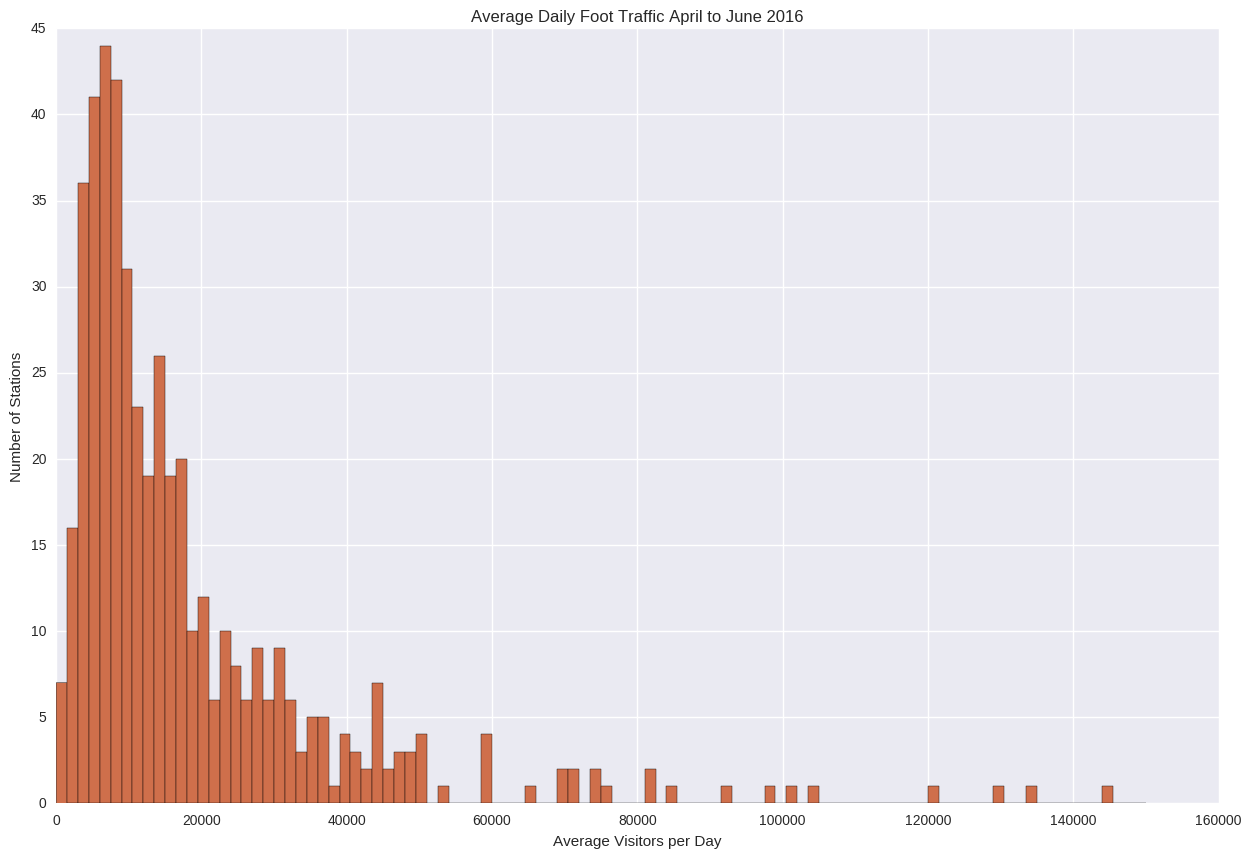

In [82]:
# Plot hist of Average Daily Traffic
plt.figure(figsize=(15,10))
#sns.distplot(avg_daily_traffic.traffic, bins=100, color="m")
plt.hist(avg_daily_traffic.traffic, bins=100, range=(0,150000), color='#cf6f4b');
plt.title("Average Daily Foot Traffic April to June 2016")
plt.ylabel("Number of Stations")
plt.xlabel("Average Visitors per Day")

## Most trafficked stations will be too busy for canvassers to be able to engage people. Want to look at stations that are slightly less busy.

In [16]:
# Find upper and lower boundaries
low = avg_daily_traffic.traffic.quantile(.7)
high = avg_daily_traffic.traffic.quantile(.9)

# Subset data by the boundries
daily_mean_for_merge = avg_daily_traffic[(avg_daily_traffic.traffic >= low) & (avg_daily_traffic.traffic <= high)]
daily_mean_for_merge.head(10)

,index,station,linename,traffic
48,175,ATL AV-BARCLAY,BDNQR2345,41608.945055
49,131,66 ST-LINCOLN,1,40710.615385
50,82,28 ST,6,40149.857143
51,440,SUTPHIN-ARCHER,EJZ,39479.659341
52,116,51 ST,6,39458.800000
53,148,8 AV,ACEL,39332.362637
54,306,GRAND ST,BD,38733.846154
55,241,CHAMBERS ST,123,37228.945055
56,291,FOREST HILLS 71,EFMR,37169.747253
57,24,14 ST,123FLM,37064.637363


In [17]:
# Add hours column for graph
mta_traffic['hour'] = mta_traffic.date_time.apply(lambda x: x.hour)
mta_traffic.head(10)

,station,linename,date_time,traffic,date,hour
0,1 AV,L,2016-03-26 04:00:00,3137.0,2016-03-26,4
1,1 AV,L,2016-03-26 08:00:00,1504.0,2016-03-26,8
2,1 AV,L,2016-03-26 12:00:00,5502.0,2016-03-26,12
3,1 AV,L,2016-03-26 16:00:00,8825.0,2016-03-26,16
4,1 AV,L,2016-03-26 20:00:00,10846.0,2016-03-26,20
5,1 AV,L,2016-03-27 00:00:00,8617.0,2016-03-27,0
6,1 AV,L,2016-03-27 04:00:00,2996.0,2016-03-27,4
7,1 AV,L,2016-03-27 08:00:00,1011.0,2016-03-27,8
8,1 AV,L,2016-03-27 12:00:00,4279.0,2016-03-27,12
9,1 AV,L,2016-03-27 16:00:00,7125.0,2016-03-27,16


In [18]:
# Get average hourly traffic per station for entire period
hourly_traffic = mta_traffic.groupby(['station', 'linename', 'hour'], as_index=False)\
     [['traffic']].mean()
hourly_traffic['name'] = hourly_traffic.station + ' ' + hourly_traffic.linename
hourly_traffic.head(10)

,station,linename,hour,traffic,name
0,1 AV,L,0,8090.744444,1 AV L
1,1 AV,L,4,1785.780220,1 AV L
2,1 AV,L,7,2490.833333,1 AV L
3,1 AV,L,8,3843.635417,1 AV L
4,1 AV,L,9,3284.200000,1 AV L
5,1 AV,L,10,874.500000,1 AV L
6,1 AV,L,12,9111.358696,1 AV L
7,1 AV,L,16,9153.131868,1 AV L
8,1 AV,L,20,12956.177778,1 AV L
9,103 ST,1,1,1790.402299,103 ST 1


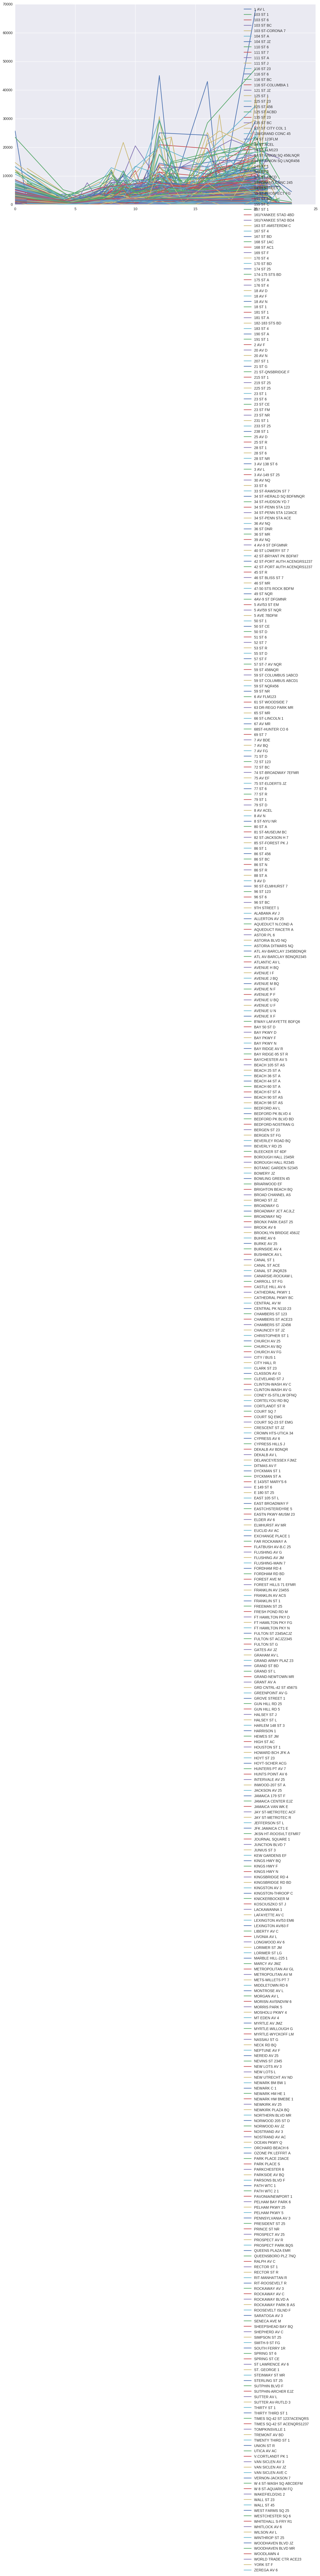

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
groups = hourly_traffic.groupby('name')

for name, gp in groups:
    ax.plot(gp.hour, gp.traffic, linestyle="-", ms=12, label=name)
ax.legend()


In [20]:
# Get unique list of stations
stations_df = mta_traffic.groupby(['station','linename']).head(1)
stations_df = stations_df.assign(join_station_line = stations_df.station + ' ' + stations_df.linename)
stations = stations_df['join_station_line']

In [21]:
# Read in income data
inc = pd.read_csv('data/income_by_subway_stops.csv')
inc.columns = [n.lower().replace(' ', '_') for n in inc.columns]

In [22]:
# Clean income data
inc = inc.dropna(subset=['stop_name']) # We don't have data for the Shuttle trains. We drop the nulls.

In [23]:
# Make a new column combining 'stop_name' with every 'subway_line' for that stop
inc.sort_values(['lat', 'long', 'subway_line'], inplace=True)
inc2 = inc.groupby(['lat','long']).head(1)
line_names = inc.groupby(['lat','long']).subway_line.agg(lambda x: ''.join(x)).tolist()
inc2 = inc2.assign(line_names = line_names)
inc2.head(10)

,subway_line,lat,long,county_name,position,income2011,income2000,stop_name,county,tract,tract_lookup,line_names
415,F,40.575929,-73.976747,Brooklyn,2.0,34984.0,25938.0,W 8 St.-New York Aquarium,47.0,35000.0,35000.0,FQ
604,Q,40.576234,-73.967561,Brooklyn,3.0,27161.0,19539.0,Ocean Parkway,47.0,36001.0,36001.0,Q
357,D,40.576900,-73.980846,Brooklyn,1.0,34984.0,25938.0,Coney Island-Stillwell Ave.,47.0,35000.0,35000.0,DFNQ
280,B,40.577986,-73.960258,Brooklyn,1.0,28398.0,18854.0,Brighton Beach,47.0,36200.0,36200.0,BQ
416,F,40.580576,-73.974443,Brooklyn,3.0,42514.0,28678.0,Neptune Ave.,47.0,35400.0,35400.0,F
281,B,40.585734,-73.954371,Brooklyn,2.0,33616.0,29405.0,Sheepshead Bay,47.0,60600.0,60600.0,BQ
358,D,40.588066,-73.983498,Brooklyn,2.0,47019.0,32670.0,Bay 50 St.,47.0,30800.0,30800.0,D
417,F,40.590266,-73.974051,Brooklyn,4.0,43929.0,26129.0,Ave. X,47.0,38600.0,38600.0,F
249,A,40.591166,-73.796173,Queens,6.0,46210.0,40219.0,Beach 67 St.,81.0,95400.0,95400.0,A
248,A,40.592292,-73.789153,Queens,5.0,69209.0,46445.0,Beach 60 St.,81.0,96400.0,96400.0,A


In [24]:
# Run .upper on stop_name and combine with line_names
inc2 = inc2.assign(station_line = inc2.stop_name.str.upper() + ' ' + inc2.line_names)

# Check for multiple entries
print inc2.groupby('station_line').size().sort_values(ascending=False)[:10]  # We don't have any! ^_^
print inc2.shape

station_line
ZEREGA AVE. 6                          1
75 ST.-ELDERTS LN. JZ                  1
77 ST. R                               1
79 ST. 1                               1
79 ST. D                               1
8 AVE. N                               1
8 ST.-N.Y.U. NR                        1
80 ST. A                               1
81 ST.-MUSEUM OF NATURAL HISTORY BC    1
82 ST.-JACKSON HEIGHTS 7               1
dtype: int64
(428, 13)


In [25]:
# Find the station_line values in the 'stations' list that most closely match what is in inc2
inc2.loc[:,'join_station_line'] = inc2.station_line.apply(lambda x: difflib.get_close_matches(x, stations, n=1, cutoff=.3))
inc2.join_station_line = inc2.join_station_line.apply(lambda x: x[0])

In [26]:
# Check for duplicate join names
print inc2.sort_values('join_station_line').groupby('join_station_line').filter(lambda x: len(x) >1).loc[
    :,['income2011','station_line','join_station_line']]

# We have some duplicates and errors. Fix the ones that need fixing:
inc2.loc[441, 'join_station_line'] = '14 ST 123FLM'
inc2.loc[272, 'join_station_line'] = '125 ST ACBD'
inc2.loc[135, 'join_station_line'] = '3 AV 138 ST 6'
inc2.loc[365, 'join_station_line'] = 'NEW UTRECHT AV ND'
inc2.loc[224, 'join_station_line'] = '5 AVE 7BDFM'
inc2.loc[188, 'join_station_line'] = 'BLEECKER ST 6DF'
inc2.loc[615, 'join_station_line'] = 'BEVERLEY ROAD BQ'
inc2.loc[264, 'join_station_line'] = 'FULTON ST ACJZ2345'

print '\n', inc2.sort_values('join_station_line').groupby('join_station_line').filter(lambda x: len(x) >1).loc[
    :,['income2011','station_line','join_station_line']]
# This looks better. Next we'll drop the duplicates, taking the entry with higher income.

     income2011                           station_line      join_station_line
268     94292.0                    14 ST.-8TH AVE. ACE             14 ST ACEL
441    150110.0                      14 ST.-6 AVE. FLM             14 ST ACEL
510     85859.0                        14 ST.-8 AVE. L             14 ST ACEL
272     31875.0                           125 ST. ABCD            145 ST ABCD
273     38786.0                           145 ST. ABCD            145 ST ABCD
143     23029.0                              183 ST. 4               183 ST 4
135     16580.0                             138 ST. 45               183 ST 4
365     42350.0                               62 ST. D              36 ST DNR
370     31463.0                             36 ST. DNR              36 ST DNR
293     69250.0                42 ST.-BRYANT PARK BDFM  42 ST-BRYANT PK BDFM7
224    129625.0                   5 AVE.-BRYANT PARK 7  42 ST-BRYANT PK BDFM7
188    116250.0  BLEECKER ST.-BROADWAY-LAFAYETTE ST. 6  B'WAY-LA

In [27]:
# Drop dupes
inc2 = inc2.sort_values(['join_station_line', 'income2011'], ascending=False).groupby('join_station_line').head(1)
inc2.shape

(423, 14)

In [28]:
# Drop columns for merge
inc3 = inc2[['lat', 'long', 'county_name', 'income2011', 'join_station_line']]
inc3.head(20)

,lat,long,county_name,income2011,join_station_line
218,40.836954,-73.846653,the Bronx,43984.0,ZEREGA AV 6
435,40.701380,-73.986655,Brooklyn,167737.0,YORK ST F
393,40.713333,-74.009033,Manhattan,205192.0,WORLD TRADE CTR ACE23
148,40.886737,-73.878120,the Bronx,32889.0,WOODLAWN 4
566,40.733555,-73.869588,Queens,53750.0,WOODHAVEN BLVD MR
504,40.694077,-73.850476,Queens,55759.0,WOODHAVEN BLVD JZ
42,40.657184,-73.949976,Brooklyn,44444.0,WINTHROP ST 25
525,40.688805,-73.904741,Brooklyn,32658.0,WILSON AV L
212,40.827295,-73.886082,the Bronx,17614.0,WHITLOCK AV 6
653,40.701938,-74.012588,Manhattan,124048.0,WHITEHALL S-FRY R1


In [29]:
# Merge income and lat/long data into our subway traffic data
daily_mean_for_merge['join_station_line'] = daily_mean_for_merge.station + ' ' + daily_mean_for_merge.linename
daily_mean_merge = pd.merge(daily_mean_for_merge, inc3, how='left', on='join_station_line')

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
# Check result
print daily_mean_merge.shape
print daily_mean_merge.sort_values('income2011', na_position='first')     [['traffic', 'join_station_line', 'lat', 'income2011']][:20] # We have some nulls!

(94, 9)
         traffic            join_station_line        lat  income2011
0   41608.945055     ATL AV-BARCLAY BDNQR2345        NaN         NaN
5   39332.362637                    8 AV ACEL        NaN         NaN
16  35231.142857            THIRTY THIRD ST 1        NaN         NaN
18  33269.516484               GROVE STREET 1        NaN         NaN
20  32200.318681            PAVONIA/NEWPORT 1        NaN         NaN
35  29838.956044             JOURNAL SQUARE 1        NaN         NaN
48  27504.406593                 CITY / BUS 1        NaN         NaN
51  26125.340659             EXCHANGE PLACE 1        NaN         NaN
52  26120.076923   TIMES SQ-42 ST ACENQRS1237        NaN         NaN
57  25334.109890  42 ST-PORT AUTH ACENGRS1237        NaN         NaN
63  24112.377778                 59 ST NQR456        NaN         NaN
78  21138.439560                 MARCY AV JMZ  40.708788     16139.0
89  19940.945055           149/GRAND CONC 245  40.818405     16580.0
34  30058.109890          

In [31]:
# Manually fix a few join names
inc3 = inc3.append(inc3.loc[132])
inc3.iloc[423, 4] = '59 ST NQR456'

inc3 = inc3.append(inc3.loc[13])
inc3.iloc[424, 4] = 'TIMES SQ-42 ST ACENQRS1237'
inc3 = inc3.append(inc3.loc[13])
inc3.iloc[425, 4] = '42 ST-PORT AUTH ACENGRS1237'

inc3 = inc3.append(inc3.loc[268])
inc3.iloc[426, 4] = '8 AV ACEL'

inc3 = inc3.append(inc3.loc[49])
inc3.iloc[427, 4] = 'ATL AV-BARCLAY BDNQR2345'

In [32]:
# Join again and check results
daily_mean_merge = pd.merge(daily_mean_for_merge, inc3, how='left', on='join_station_line')

print daily_mean_merge.shape
print daily_mean_merge.sort_values('income2011', na_position='first')     [['traffic', 'join_station_line', 'lat', 'income2011']][:20] 
    
# Looks good. The remaining null are all the PATH trains. We'll drop those.
inc3.dropna(inplace=True)

(95, 9)
         traffic     join_station_line        lat  income2011
16  35231.142857     THIRTY THIRD ST 1        NaN         NaN
18  33269.516484        GROVE STREET 1        NaN         NaN
21  32200.318681     PAVONIA/NEWPORT 1        NaN         NaN
36  29838.956044      JOURNAL SQUARE 1        NaN         NaN
49  27504.406593          CITY / BUS 1        NaN         NaN
52  26125.340659      EXCHANGE PLACE 1        NaN         NaN
79  21138.439560          MARCY AV JMZ  40.708788     16139.0
90  19940.945055    149/GRAND CONC 245  40.818405     16580.0
35  30058.109890        3 AV-149 ST 25  40.816265     23670.0
91  19846.285714     116 ST-COLUMBIA 1  40.808245     26406.0
84  20411.197802              181 ST 1  40.849435     27324.0
55  25568.175824     137 ST CITY COL 1  40.821454     27477.0
94  19139.109890     BRIGHTON BEACH BQ  40.577986     28398.0
72  23207.461538              116 ST 6  40.798742     28567.0
89  20167.714286             36 ST DNR  40.654365     31463.0


In [33]:
daily_mean_merge.rename(columns={'income2011':'income'}, inplace=True)
daily_mean_merge.shape

(95, 9)

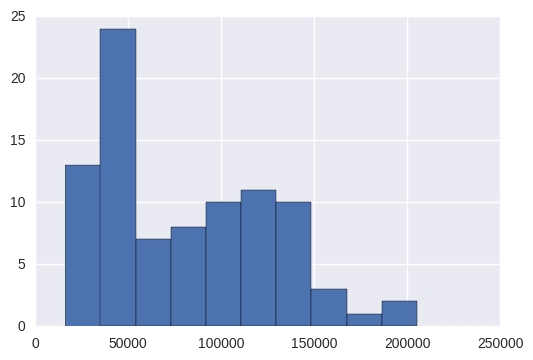

In [34]:
daily_mean_merge.income.hist()

In [35]:
daily_mean_merge.sort_values('income', ascending=False)

,index,station,linename,traffic,join_station_line,lat,long,county_name,income
7,241,CHAMBERS ST,123,37228.945055,CHAMBERS ST 123,40.715576,-74.009031,Manhattan,205192.0
87,471,WORLD TRADE CTR,ACE23,20241.263736,WORLD TRADE CTR ACE23,40.713333,-74.009033,Manhattan,205192.0
47,111,5 AV/59 ST,NQR,27740.263736,5 AV/59 ST NQR,40.764657,-73.972229,Manhattan,171000.0
31,232,CANAL ST,ACE,30734.065934,CANAL ST ACE,40.720758,-74.005399,Manhattan,164656.0
37,354,LEXINGTON AV/63,F,29809.846154,LEXINGTON AV/63 F,40.764881,-73.966411,Manhattan,152353.0
9,24,14 ST,123FLM,37064.637363,14 ST 123FLM,40.738678,-73.995632,Manhattan,150110.0
57,120,57 ST,F,25343.725275,57 ST F,40.764564,-73.976830,Manhattan,144659.0
1,131,66 ST-LINCOLN,1,40710.615385,66 ST-LINCOLN 1,40.773457,-73.982004,Manhattan,142452.0
38,171,ASTOR PL,6,29685.450549,ASTOR PL 6,40.730084,-73.990838,Manhattan,139236.0
44,150,8 ST-NYU,NR,28384.109890,8 ST-NYU NR,40.730385,-73.992182,Manhattan,139236.0


In [36]:
# Drop high-traffic stations that weren’t caught in the aggregate drop (since
# some stations were split into multiple)
daily_mean_merge.drop([59,39,65,58,53,0,19,20], inplace=True)

# Combine stations that were split into multiple that we want to keep
daily_mean_merge.loc[9, 'traffic'] += daily_mean_merge.loc[15, 'traffic']
daily_mean_merge.loc[5, 'traffic'] += daily_mean_merge.loc[17, 'traffic']
daily_mean_merge.drop([15, 17], inplace = True)

In [37]:
daily_mean_merge.sort_values('income', ascending=False).head(50)

,index,station,linename,traffic,join_station_line,lat,long,county_name,income
87,471,WORLD TRADE CTR,ACE23,20241.263736,WORLD TRADE CTR ACE23,40.713333,-74.009033,Manhattan,205192.0
7,241,CHAMBERS ST,123,37228.945055,CHAMBERS ST 123,40.715576,-74.009031,Manhattan,205192.0
47,111,5 AV/59 ST,NQR,27740.263736,5 AV/59 ST NQR,40.764657,-73.972229,Manhattan,171000.0
31,232,CANAL ST,ACE,30734.065934,CANAL ST ACE,40.720758,-74.005399,Manhattan,164656.0
37,354,LEXINGTON AV/63,F,29809.846154,LEXINGTON AV/63 F,40.764881,-73.966411,Manhattan,152353.0
9,24,14 ST,123FLM,72496.395604,14 ST 123FLM,40.738678,-73.995632,Manhattan,150110.0
57,120,57 ST,F,25343.725275,57 ST F,40.764564,-73.976830,Manhattan,144659.0
1,131,66 ST-LINCOLN,1,40710.615385,66 ST-LINCOLN 1,40.773457,-73.982004,Manhattan,142452.0
38,171,ASTOR PL,6,29685.450549,ASTOR PL 6,40.730084,-73.990838,Manhattan,139236.0
44,150,8 ST-NYU,NR,28384.109890,8 ST-NYU NR,40.730385,-73.992182,Manhattan,139236.0


In [38]:
# Concatenate long/lat and export to .csv
daily_mean_merge['longlat'] = daily_mean_merge['long'].astype(str) + ', ' + daily_mean_merge['lat'].astype(str)
daily_mean_merge.sort_values('income', ascending=False).head(50).to_csv('data/final_stations.csv')

## Additional Visualizations

In [43]:
# Subset our data to include only turnstiles less than 3000
entry_traffic = mta[(mta.ent_diff < 3000)]
entry_traffic.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time,ent_diff,ex_diff,traffic
1,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,04:00:00,REGULAR,5595746,1893282,2016-03-26 04:00:00,0.0,5.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,08:00:00,REGULAR,5595746,1893282,2016-03-26 08:00:00,0.0,0.0,0.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,12:00:00,REGULAR,5595746,1893282,2016-03-26 12:00:00,0.0,0.0,0.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,16:00:00,REGULAR,5595746,1893282,2016-03-26 16:00:00,0.0,0.0,0.0
5,A002,R051,02-00-00,59 ST,NQR456,BMT,03/26/2016,20:00:00,REGULAR,5595746,1893282,2016-03-26 20:00:00,0.0,0.0,0.0


In [46]:
traffic = entry_traffic.groupby(['date'], as_index=False)[['ent_diff']].sum()
traffic.head()

,date,ent_diff
0,03/26/2016,3018378.0
1,03/27/2016,2784304.0
2,03/28/2016,5612942.0
3,03/29/2016,6130967.0
4,03/30/2016,6237442.0


In [53]:
import datetime

def make_date(date_str):
    return datetime.datetime.strptime(date_str, "%m/%d/%Y").date()
    

In [58]:
traffic['date'] = traffic['date'].apply(make_date)
traffic['weekday'] = traffic['date'].apply(lambda x: x.weekday())

In [62]:
tr = traffic.groupby(['weekday'], as_index=False)[['ent_diff']].mean()

([<matplotlib.axis.XTick at 0x7fac81aeec50>,
 <a list of 7 Text xticklabel objects>)

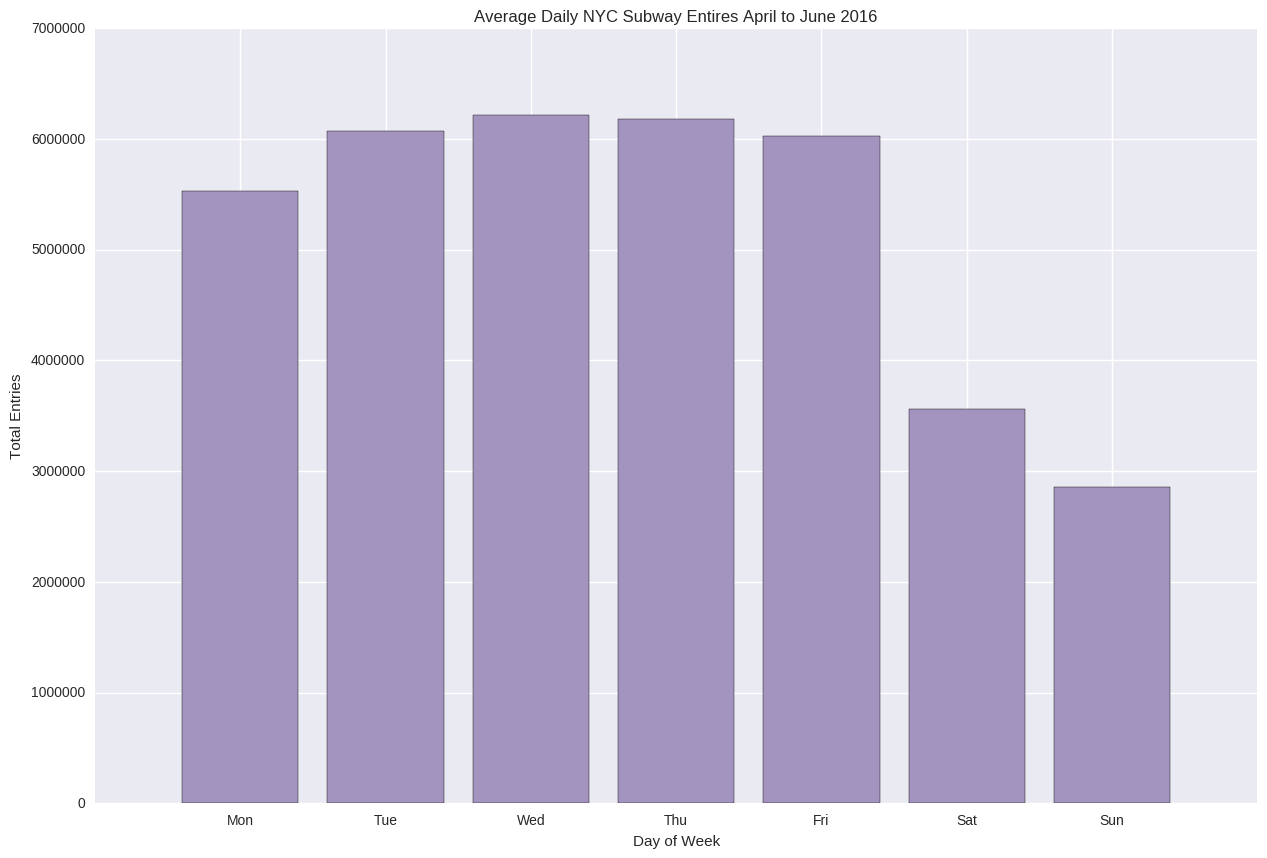

In [88]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(15,10))
plt.bar(tr.weekday, tr.ent_diff, align='center', color='#a393bf');
plt.title("Average Daily NYC Subway Entires April to June 2016")
plt.xlabel("Day of Week")
plt.ylabel("Total Entries")
plt.xticks(tr.weekday, weekdays)